In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


sns.set_style('darkgrid')
pd. set_option("display.max_columns", None)


### <span style="color:#00008B">Importing the Dataset</span>

In [2]:
df = pd.read_csv("RTA Dataset.csv")

In [3]:
df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

##### Service year of vehichle, Sex of casuality, Fitness of Casuality and Work of casuality would not have any relation with Accident severity

### <span style="color:#00008B">Data Preprocessing</span>

#### Converting all the columns to lowercase

In [4]:
df.columns = df.columns.str.lower()

In [5]:
df.shape

(12316, 32)

In [6]:
df.describe()

,number_of_vehicles_involved,number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [7]:
df.head()

,time,day_of_week,age_band_of_driver,sex_of_driver,educational_level,vehicle_driver_relation,driving_experience,type_of_vehicle,owner_of_vehicle,service_year_of_vehicle,defect_of_vehicle,area_accident_occured,lanes_or_medians,road_allignment,types_of_junction,road_surface_type,road_surface_conditions,light_conditions,weather_conditions,type_of_collision,number_of_vehicles_involved,number_of_casualties,vehicle_movement,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,work_of_casuality,fitness_of_casuality,pedestrian_movement,cause_of_accident,accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


#### Converting `time` column into datetime field

In [8]:
df['time'] = pd.to_datetime(df['time'])

#### Extracting HOUR and MINUTES from TIME col

In [9]:
df['hour'] = df['time'].dt.hour 
df['minute']=df['time'].dt.minute

In [10]:
df.drop('time',axis = 1,inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
df.isna().sum()

day_of_week                       0
age_band_of_driver                0
sex_of_driver                     0
educational_level               741
vehicle_driver_relation         579
driving_experience              829
type_of_vehicle                 950
owner_of_vehicle                482
service_year_of_vehicle        3928
defect_of_vehicle              4427
area_accident_occured           239
lanes_or_medians                385
road_allignment                 142
types_of_junction               887
road_surface_type               172
road_surface_conditions           0
light_conditions                  0
weather_conditions                0
type_of_collision               155
number_of_vehicles_involved       0
number_of_casualties              0
vehicle_movement                308
casualty_class                    0
sex_of_casualty                   0
age_band_of_casualty              0
casualty_severity                 0
work_of_casuality              3198
fitness_of_casuality        

Checking if the dataset is imbalanced

In [13]:
df['accident_severity'].value_counts()

Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: accident_severity, dtype: int64

Yes, it is clearly imbalanced so we need to oversample it

In [14]:
df['defect_of_vehicle'].value_counts()

No defect    7777
7              76
5              36
Name: defect_of_vehicle, dtype: int64

We can drop defect of vehicle as it is imbalanced and contains almost 35% NaN values. So it won't add much significance to our result.

In [15]:
df.columns

Index(['day_of_week', 'age_band_of_driver', 'sex_of_driver',
       'educational_level', 'vehicle_driver_relation', 'driving_experience',
       'type_of_vehicle', 'owner_of_vehicle', 'service_year_of_vehicle',
       'defect_of_vehicle', 'area_accident_occured', 'lanes_or_medians',
       'road_allignment', 'types_of_junction', 'road_surface_type',
       'road_surface_conditions', 'light_conditions', 'weather_conditions',
       'type_of_collision', 'number_of_vehicles_involved',
       'number_of_casualties', 'vehicle_movement', 'casualty_class',
       'sex_of_casualty', 'age_band_of_casualty', 'casualty_severity',
       'work_of_casuality', 'fitness_of_casuality', 'pedestrian_movement',
       'cause_of_accident', 'accident_severity', 'hour', 'minute'],
      dtype='object')

In [16]:
cols_to_be_dropped = ['defect_of_vehicle','fitness_of_casuality','work_of_casuality','vehicle_driver_relation','service_year_of_vehicle','sex_of_casualty']

#### Steps for a cleaned dataset: <br>
1. Remove the not needed cols <br>
2. Encode the data <br>
3. Resample the data

In [17]:
cat_cols = [i for i in df.columns if i not in ['number_of_vehicles_involved','number_of_casualties','minute','hour']]

In [18]:
for i in cat_cols:
    print(f'Number of unique values for {i} column',df[i].nunique(),f'\nNumber of null values in {i} column',df[i].isna().sum(),'\n')
    print(df[i].value_counts(),'\n\n\n')

Number of unique values for day_of_week column 7 
Number of null values in day_of_week column 0 

Friday       2041
Thursday     1851
Wednesday    1840
Tuesday      1770
Monday       1681
Saturday     1666
Sunday       1467
Name: day_of_week, dtype: int64 



Number of unique values for age_band_of_driver column 5 
Number of null values in age_band_of_driver column 0 

18-30       4271
31-50       4087
Over 51     1585
Unknown     1548
Under 18     825
Name: age_band_of_driver, dtype: int64 



Number of unique values for sex_of_driver column 3 
Number of null values in sex_of_driver column 0 

Male       11437
Female       701
Unknown      178
Name: sex_of_driver, dtype: int64 



Number of unique values for educational_level column 7 
Number of null values in educational_level column 741 

Junior high school    7619
Elementary school     2163
High school           1110
Above high school      362
Writing & reading      176
Unknown                100
Illiterate              45
Name: ed

### EDA

In [19]:
df.columns

Index(['day_of_week', 'age_band_of_driver', 'sex_of_driver',
       'educational_level', 'vehicle_driver_relation', 'driving_experience',
       'type_of_vehicle', 'owner_of_vehicle', 'service_year_of_vehicle',
       'defect_of_vehicle', 'area_accident_occured', 'lanes_or_medians',
       'road_allignment', 'types_of_junction', 'road_surface_type',
       'road_surface_conditions', 'light_conditions', 'weather_conditions',
       'type_of_collision', 'number_of_vehicles_involved',
       'number_of_casualties', 'vehicle_movement', 'casualty_class',
       'sex_of_casualty', 'age_band_of_casualty', 'casualty_severity',
       'work_of_casuality', 'fitness_of_casuality', 'pedestrian_movement',
       'cause_of_accident', 'accident_severity', 'hour', 'minute'],
      dtype='object')

In [20]:
df[['number_of_casualties','number_of_vehicles_involved']].nunique()

number_of_casualties           8
number_of_vehicles_involved    6
dtype: int64

In [21]:
col_list = [i for i in df.columns if i not in ['pedestrian_movement','minute','hour','accident_severity']]

IndexError: list index out of range

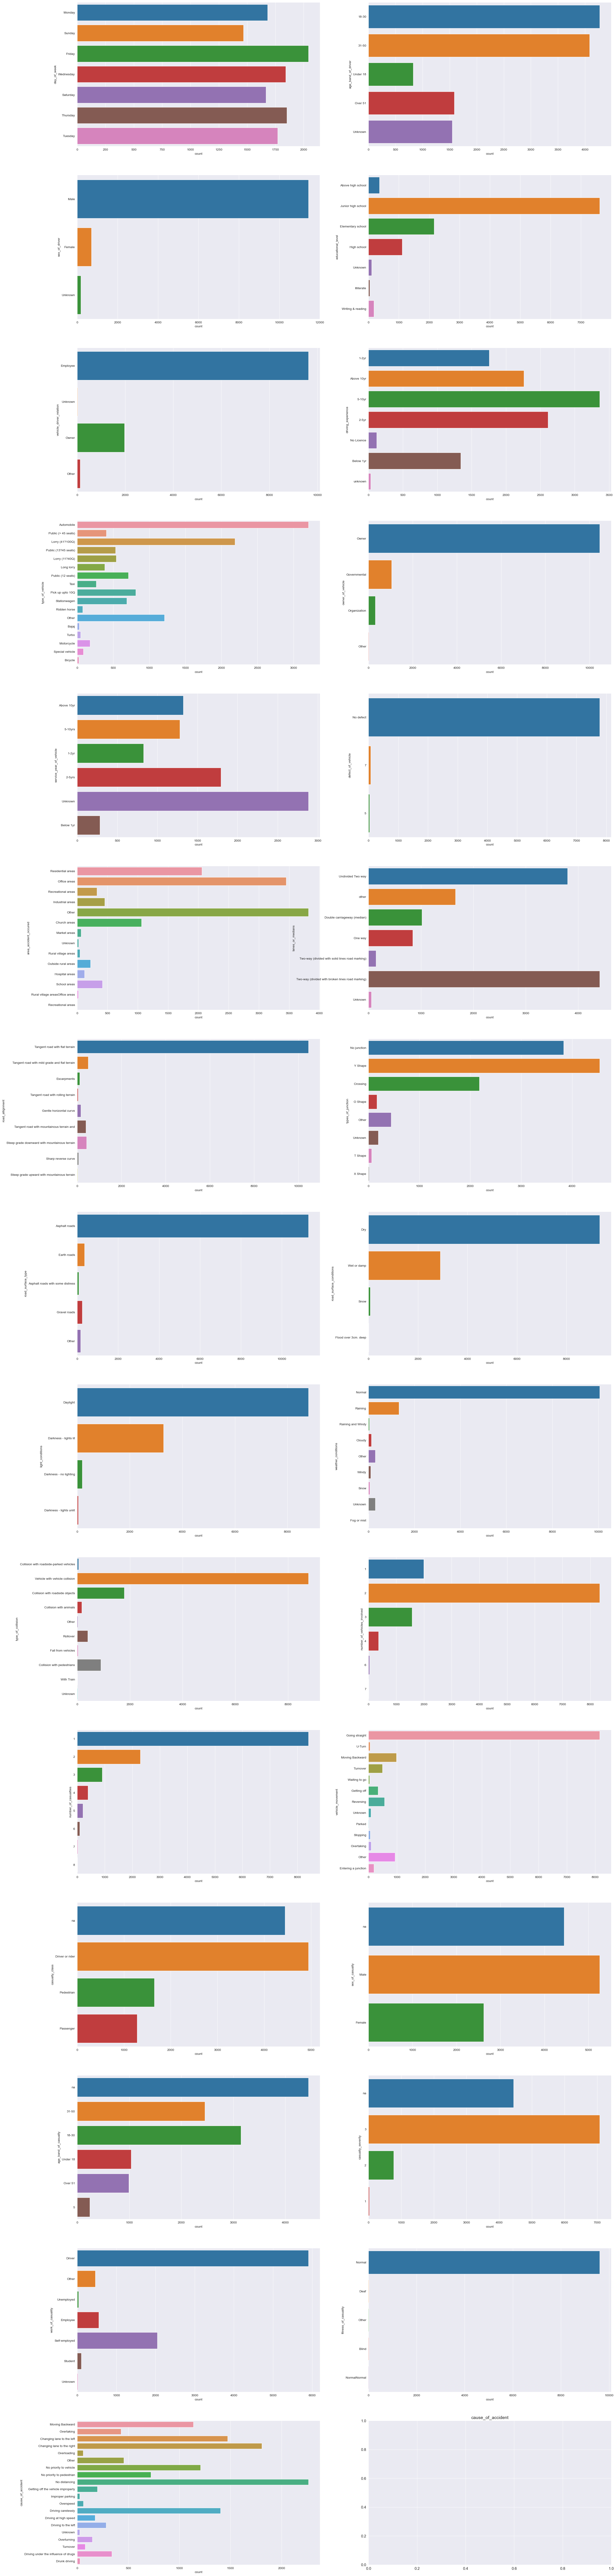

In [22]:
plot_rows = len(col_list)//2 if len(col_list) % 2 == 0 else len(col_list)//2 +1
fig,axes = plt.subplots(plot_rows,2,figsize = (30,5*len(col_list)))
i = 0
while i < plot_rows:
    sns.countplot(y = col_list[i*2],data = df,orient='v',ax=axes[i][0])
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(col_list[i*2], fontsize=14)
    plt.xlabel('')
    plt.ylabel('')
    sns.countplot(y = col_list[i*2+1],data = df,orient='v',ax = axes[i][1])
    
    i = i+1

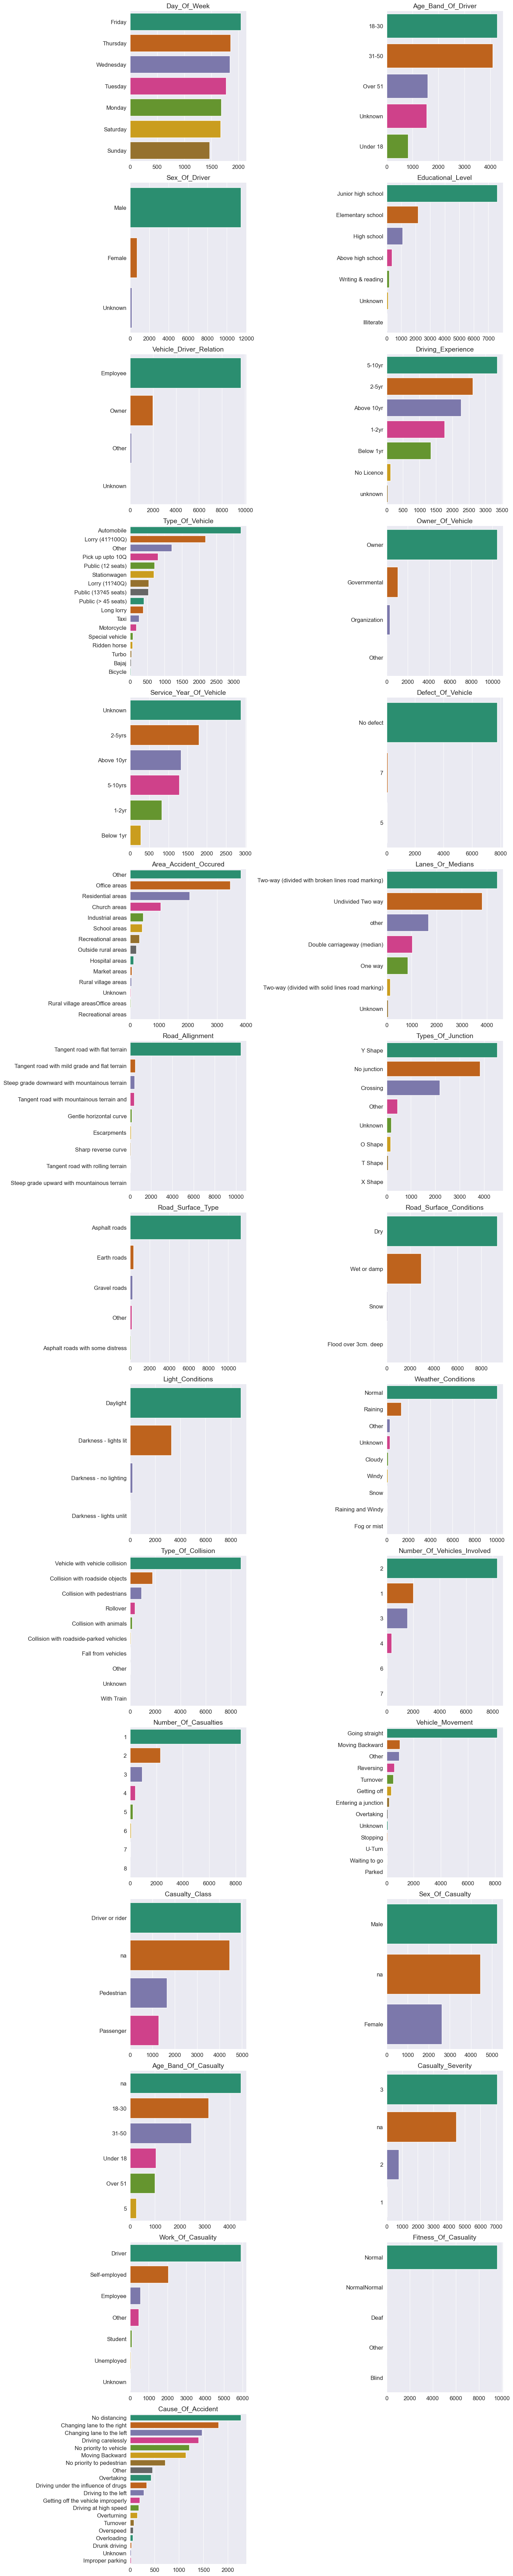

In [ ]:
plot_rows = len(col_list)//2 if len(col_list) % 2 == 0 else len(col_list)//2 +1
plt.figure(figsize = (15,5*plot_rows))
i = 0
while i < len(col_list):
    ax1 = plt.subplot(plot_rows,2,i+1)
    sns.countplot(data=df, y=col_list[i], palette='Dark2',order=df[col_list[i]].value_counts().index)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(col_list[i].title(), fontsize=14)
    plt.xlabel('')
    plt.ylabel('')
    
    i = i+1
plt.tight_layout()

In [ ]:
['pedestrian_movement','road_alignment','minute','hour','accident_severity']

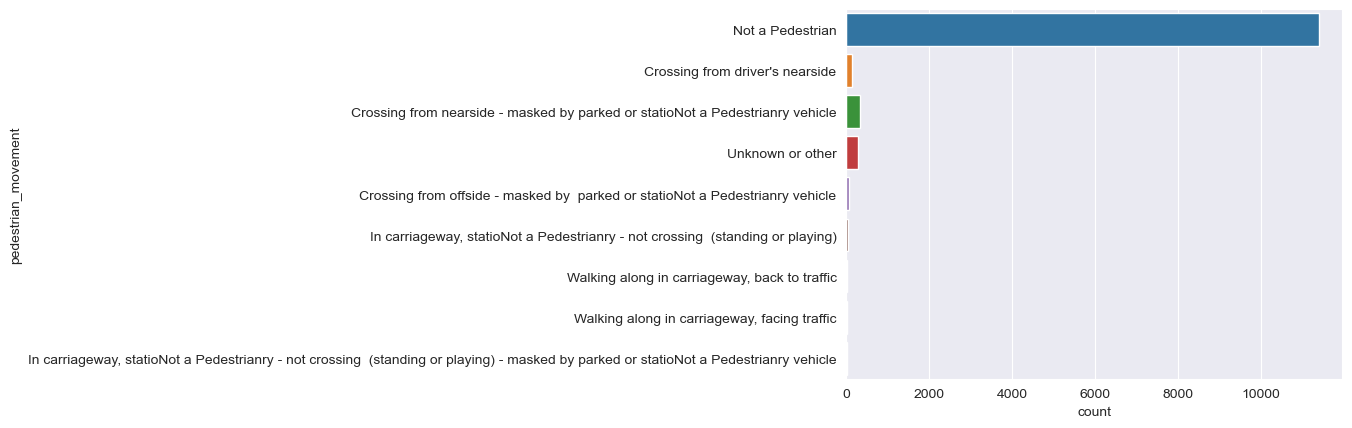

In [24]:
sns.countplot(data = df,y = 'pedestrian_movement');

Text(0, 0.5, '')

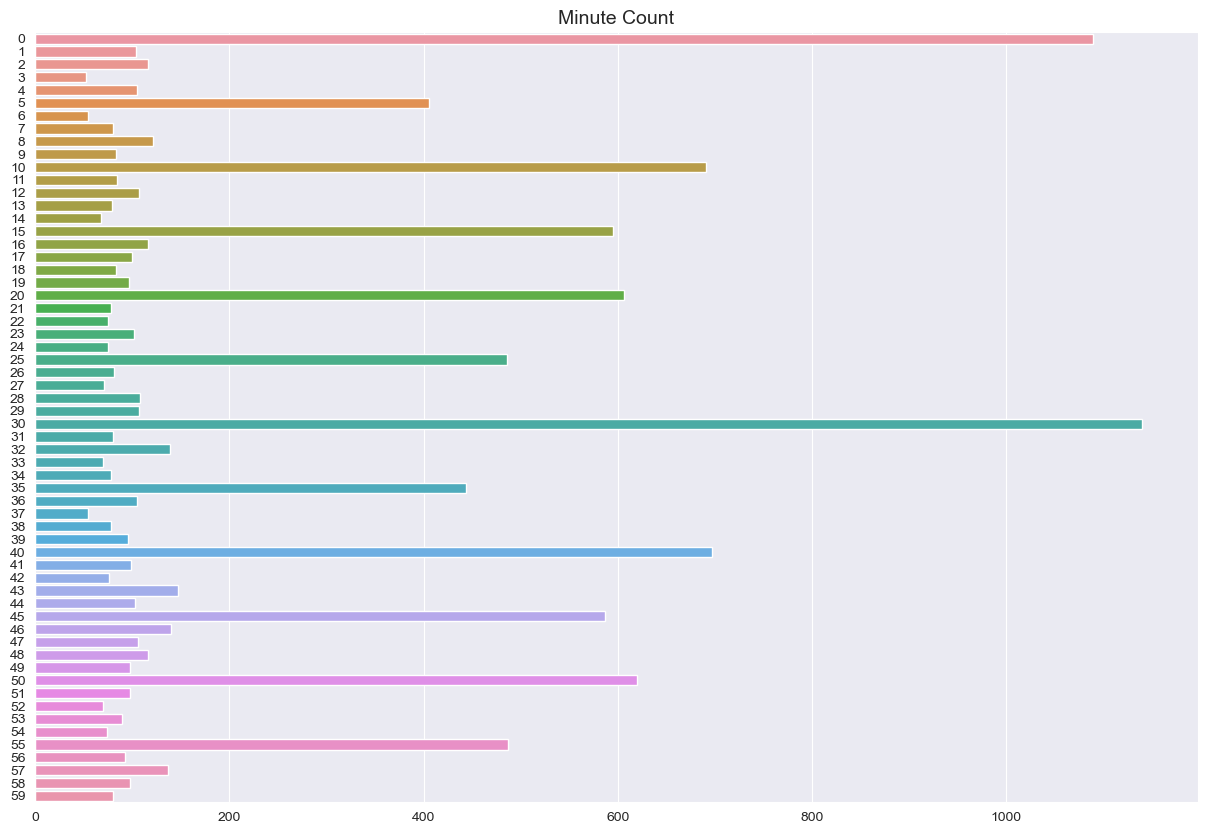

In [30]:
plt.figure(figsize=(15,10))
sns.countplot(data = df,y = 'minute');
plt.title('Minute Count',fontsize = 14)
plt.xlabel('')
plt.ylabel('')

Text(0, 0.5, '')

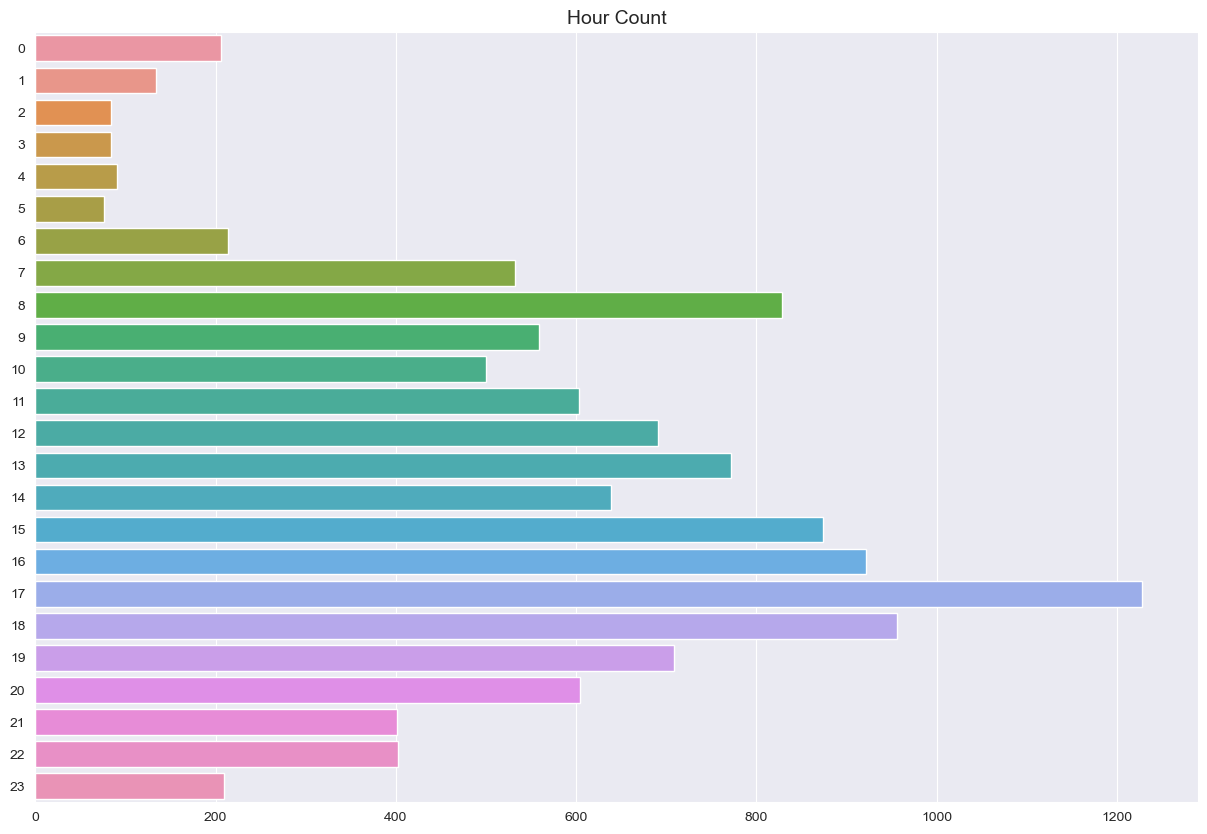

In [31]:
plt.figure(figsize=(15,10))
sns.countplot(data = df,y = 'hour');
plt.title('Hour Count',fontsize = 14)
plt.xlabel('')
plt.ylabel('')

#### Observations(As per the given dataset)
* Most number of accidents occur of Friday
* Most accidents occur during 5pm


Driver's Observations:
* Most of the accidents are drivers who are 18-30 years of age followed by 31-50 years
* Their Educational level is upto Junior high School
* Most of the drivers are employees
* having 5-10yr of exprience

Vehicle
* auto mobiles have the maximum accidents
* MOstof the vehichles have no defect at all
* Most of the vehicles going straight have accidents`

Areas:
* Rural village areas have very less number of accidnets compare to Industrial and REsidential areas
* Most accidents occur in two way lanes with broken line marking
* Roads with flat terrain
* In Y shape junction 
* Asphalts Roads


* most of the accidents occur due to no distancin changing lanes
